In [505]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy.cluster
import scipy.io
import scipy.ndimage

In [506]:
#Load Data
wine_data = scipy.io.loadmat(f"./data.mat")
y = wine_data["y"]
X = wine_data["X"]
X_test = wine_data["X_test"]

size = X.shape[0]

def split_data(data, labels, val_size):
    
    size = data.shape[0]
    
    if (val_size < 1):
        val_size = (int) (size * val_size)
    
    train_size = size - val_size
    indices = np.random.permutation(size)
    train_indices, val_indices = indices[:train_size], indices[train_size:]
    return data[train_indices], labels[train_indices], data[val_indices], labels[val_indices]


#Normalize Data
def normalize(data):
    for x in range(data.shape[1]):
        m = np.mean(data[:,x])
        s = np.std(data[:,x])
        data[:,x] = (data[:,x] - m)/s
        

#Append extra dimension 
def add_ones(data):
    ones = np.full((data.shape[0], 1), 1)
    data = np.append(data, ones, axis=1)
    return data 

In [509]:
#Define Functons for Gradient Descent

def sigmoid(X, y, w):
    s = np.zeros(y.shape)
    for i in range(X.shape[0]):
        s[i] = 1/(1 + np.e**(-np.dot(X[i], w)))
    return s

def get_grad(X, y, s, w, reg):
    return -np.matmul(X.T, y-s) + 2*reg*w

def cost_fn(X, y, w, reg):
    s = sigmoid(X, y, w)
    return -np.dot(y.T, np.log(s)) - np.dot((np.ones(y.shape) - y).T, np.log(np.ones(s.shape) - s)) + (reg / 2) * w.T.dot(w)

def make_pred(X, w):
    
    prob = sigmoid(add_ones(X), np.zeros(X.shape[0]), w)
    print(X.shape, prob.shape)
    y_pred = np.zeros(prob.shape)
    
    for x in range(prob.shape[0]):
        if prob[x] > .5:
            y_pred[x] = 1
        else:
            y_pred[x] = 0
    
    return y_pred.reshape(-1,)

def get_acc(pred, actual):
    
    correct = 0
    
    for x in range(pred.shape[0]):
        if pred[x] == actual[x]:
            correct+=1
    
    return correct/pred.shape[0]
        

def batch_gd(X, y, w, reg, step_size, iterations):
    cost_list = []
    cost_list.append(cost_fn(X, y, w, reg))
    s = sigmoid(X, y, w)
    grad = get_grad(X, y, s, w, reg)
    i = 1
    while (i < iterations):
        if (i % 100 == 0):
            print(i, cost_list[i-1])
        i = i + 1
        w = w - step_size * grad
        s = sigmoid(X, y, w)
        cost_list.append(cost_fn (X, y, w, reg)[0][0])
        grad = get_grad(X, y, s, w, reg)
        
    return w, cost_list
    

In [305]:

x_train, y_train, x_val, y_val = split_data(X, y, 2000)
normalize(x_train)
normalize(x_val)
x_train = add_ones(x_train)

w0 = np.ones((13, 1))

w, cost = batch_gd(x_train, y_train, w0, 1e-1, 1e-5, 10000)

/var/folders/3y/mmgj76q10bnb3vvxyvns_dmc0000gn/T/ipykernel_46404/1308623454.py:14: RuntimeWarning: divide by zero encountered in log
  return -np.dot(y.T, np.log(s)) - np.dot((np.ones(y.shape) - y).T, np.log(np.ones(s.shape) - s)) + (reg / 2) * w.T.dot(w)


100 1536.8424654119558
200 815.9994096379022
300 575.8500089691554
400 458.91946463730585
500 389.5136384425595
600 343.3068756773453
700 310.23578140972154
800 285.381356403772
900 266.03682752082125
1000 250.57741533066442
1100 237.96203460051996
1200 227.48923535159773
1300 218.66743067244485
1400 211.1412723595448
1500 204.64755667827052
1600 198.98751585384878
1700 194.0086465085742
1800 189.5923556499391
1900 185.64531849746558
2000 182.09329882487384
2100 178.8766540554072
2200 175.94701993965384
2300 173.2648357011288
2400 170.7974764714021
2500 168.51782982284737
2600 166.40320059269507
2700 164.43446084062688
2800 162.59538458182547
2900 160.8721230428482
3000 159.25278768585193
3100 157.72711653775198
3200 156.2862053973702
3300 154.92228992872603
3400 153.6285679355821
3500 152.3990535680931
3600 151.22845706158654
3700 150.11208500976508
3800 149.04575724557068
3900 148.02573722606934
4000 147.04867345435352
4100 146.11154996692238
4200 145.2116443025878
4300 144.346491674

(2000, 12) (2000,)
0.9905


Text(0.5, 1.0, 'Step Size vs Accuracy')

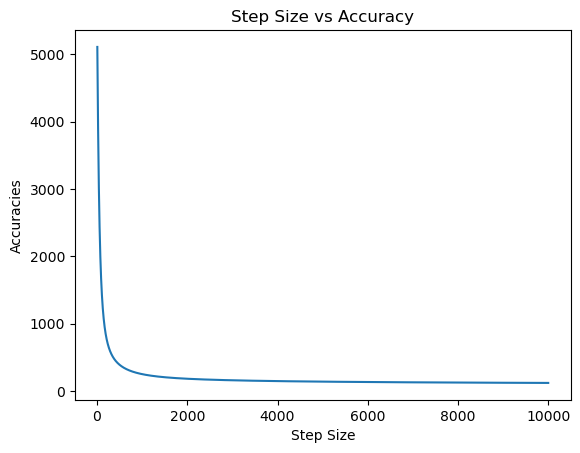

In [310]:

y_pred = make_pred(x_val, w)
print(get_acc(y_pred, y_val))
plt.plot(np.arange(10000), cost)
plt.xlabel("Step Size")
plt.ylabel("Accuracies")
plt.title("Step Size vs Accuracy")

In [263]:

reg_params = [1e-1, 1, 1e2, 1e3, 1e4]
step_size = [1e-1, 1e-3, 1e-5, 1e-6]

x_train, y_train, x_val, y_val = split_data(X, y, 1000)
normalize(x_train)
x_train = add_ones(x_train)
w0 = np.ones((13, 1))
s0 = sigmoid(x_train, y_train, w0)
reg = 1

#Hypertuning to find best step_size

accuracies1 = []

for x in step_size:
    
    #train
    w = batch_gd(x_train, y_train, w0, s0, reg, x, 1000)
    #predict on val_set
    pred_val = make_pred(x_val, w)
    accuracies.append(get_acc(pred_val, y_val))
#best acc from setting step size to 1e-5


#Tune for best reg parameter
    

/var/folders/3y/mmgj76q10bnb3vvxyvns_dmc0000gn/T/ipykernel_46404/2139317645.py:13: RuntimeWarning: divide by zero encountered in log
  return -np.dot(y.T, np.log(s)) - np.dot((np.ones(y.shape) - y).T, np.log(np.ones(s.shape) - s))


(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)


ValueError: x and y must be the same size

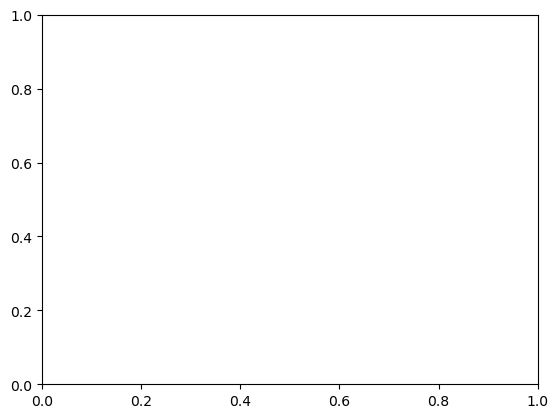

In [268]:
plt.scatter(step_size, accuracies1)
plt.xlabel("Step Size")
plt.ylabel("Accuracies")
plt.title("Step Size vs Accuracy")

/var/folders/3y/mmgj76q10bnb3vvxyvns_dmc0000gn/T/ipykernel_46404/2139317645.py:13: RuntimeWarning: divide by zero encountered in log
  return -np.dot(y.T, np.log(s)) - np.dot((np.ones(y.shape) - y).T, np.log(np.ones(s.shape) - s))


(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)
(1000, 12) (1000,)


Text(0.5, 1.0, 'Cost vs Iteration')

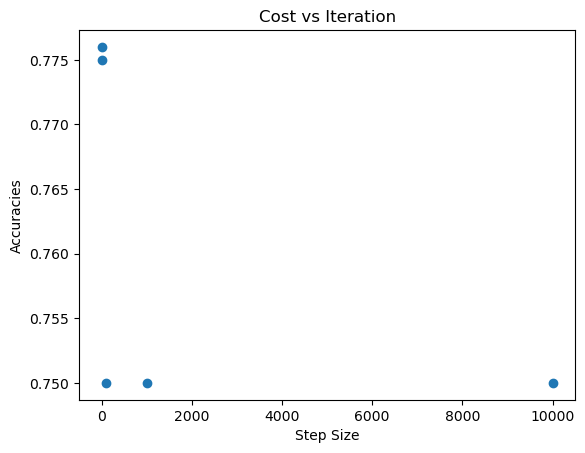

In [265]:
accuracies = []
for x in reg_params:
    w = batch_gd(x_train, y_train, w0, s0, x, 1e-5, 1000)
    #predict on val_set
    pred_val = make_pred(x_val, w)
    accuracies.append(get_acc(pred_val, y_val))

plt.scatter(reg_params, accuracies)
plt.xlabel("Lambda")
plt.ylabel("Accuracies")
plt.title("Lambda vs Accuracy")

In [267]:
print(accuracies)
#Best lambda = 1e-1

[0.776, 0.775, 0.75, 0.75, 0.75]


In [250]:
y_pred = make_pred(w)
def results_to_csv(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1 # Ensures that the index starts at 1
    df.to_csv('submission.csv', index_label='Id')
results_to_csv(y_pred.reshape(-1,))

(497, 12) (497,)


In [462]:
#Stoichastic Descent

def sigmoid_s(Xi, w):
    return 1/(1 + np.e**(-np.dot(Xi.T, w)))

def gradient_s(x, y, s, w, reg):
    d = np.zeros(x.shape)
    for i in range(x.shape[0]):
        d[i] = -x[i] *(y - s)
    return d + 2*reg*w

def s_gd(X, y, w, reg, step_size, iterations):
    cost_list = []
    cost_list.append(cost_fn(X, y, w, reg))
    Xi = X[0]
    yi = y[0]
    size = X.shape[0]
    si = sigmoid_s(Xi, w)
    grad = gradient_s(Xi, yi, si, w, reg)
    i = 1
    while (i < iterations):
        w = w - step_size * grad
        Xi = X[i % size]
        yi = y[i % size]
        si = sigmoid_s(Xi, w)
        cost_list.append(cost_fn(X, y, w, reg)[0][0])
        grad = gradient_s(Xi, yi, si, w, reg)
        i = i + 1
        
    return w, cost_list

In [479]:
x_train, y_train, x_val, y_val = split_data(X, y, 2000)
normalize(x_train)
normalize(x_val)
x_train = add_ones(x_train)
w0 = np.ones((13, ))
print(w0)
w = s_gd(x_train, y_train, w0, 1, 1e-3, 10000)

[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


/var/folders/3y/mmgj76q10bnb3vvxyvns_dmc0000gn/T/ipykernel_46404/836105201.py:14: RuntimeWarning: divide by zero encountered in log
  return -np.dot(y.T, np.log(s)) - np.dot((np.ones(y.shape) - y).T, np.log(np.ones(s.shape) - s)) + (reg / 2) * w.T.dot(w)


(2000, 12) (2000,)
10000
0.965


Text(0.5, 1.0, 'Cost vs Iterations')

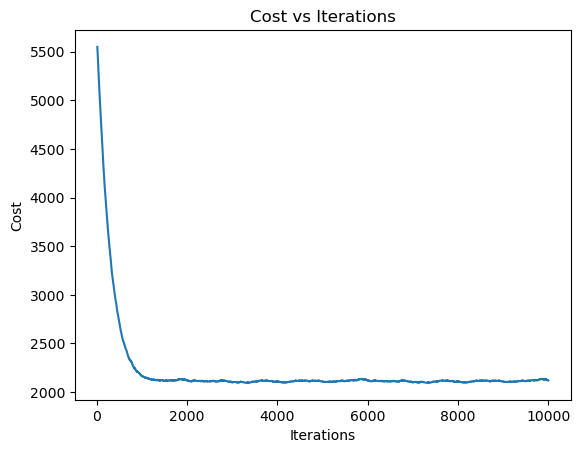

In [480]:
y_pred = make_pred(x_val, w[0])
print(len(w[1]))
print(get_acc(y_pred, y_val))
plt.plot(np.arange(10000), w[1])
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations")

In [481]:
def s_gd2(X, y, w, reg, step_size, iterations):
    cost_list = []
    cost_list.append(cost_fn(X, y, w, reg))
    Xi = X[0]
    yi = y[0]
    size = X.shape[0]
    si = sigmoid_s(Xi, w)
    grad = gradient_s(Xi, yi, si, w, reg)
    i = 1
    while (i < iterations):
        Xi = X[i % size]
        yi = y[i % size]
        w = w - step_size/i * grad
        si = sigmoid_s(Xi, w)
        cost_list.append(cost_fn(X, y, w, reg)[0][0])
        grad = gradient_s(Xi, yi, si, w, reg)
        i = i + 1
        
    return w, cost_list

In [484]:
x_train, y_train, x_val, y_val = split_data(X, y, 2000)
normalize(x_train)
normalize(x_val)
x_train = add_ones(x_train)
w0 = np.ones((13, ))
w = s_gd2(x_train, y_train, w0, 1, .1, 10000)

/var/folders/3y/mmgj76q10bnb3vvxyvns_dmc0000gn/T/ipykernel_46404/836105201.py:14: RuntimeWarning: divide by zero encountered in log
  return -np.dot(y.T, np.log(s)) - np.dot((np.ones(y.shape) - y).T, np.log(np.ones(s.shape) - s)) + (reg / 2) * w.T.dot(w)


(2000, 12) (2000,)
10000
0.82


Text(0.5, 1.0, 'Cost vs Iterations')

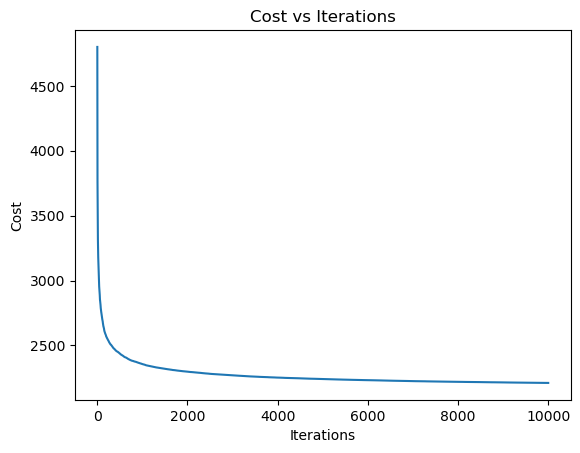

In [485]:
y_pred = make_pred(x_val, w[0])
print(len(w[1]))
print(get_acc(y_pred, y_val))
plt.plot(np.arange(10000), w[1])
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost vs Iterations")

In [510]:
x_train, y_train, x_val, y_val = split_data(X, y, 0)
normalize(x_train)
normalize(X_test)
x_train = add_ones(x_train)
w0 = np.ones((13,1))
w = batch_gd(x_train, y_train, w0, 1e-1, 1e-5, 10000)

/var/folders/3y/mmgj76q10bnb3vvxyvns_dmc0000gn/T/ipykernel_46404/1253041676.py:14: RuntimeWarning: divide by zero encountered in log
  return -np.dot(y.T, np.log(s)) - np.dot((np.ones(y.shape) - y).T, np.log(np.ones(s.shape) - s)) + (reg / 2) * w.T.dot(w)


100 1583.4310694544918
200 871.3825601769091
300 643.4440130611229
400 531.1403832854062
500 464.06729710956046
600 419.5781793621229
700 388.0572536019119
800 364.6652090947114
900 346.6836518548358
1000 332.46582585734023
1100 320.9580407258982
1200 311.4575288507453
1300 303.47988453981077
1400 296.68195341234673
1500 290.81484403953397
1600 285.69424214370196
1700 281.1810978178105
1800 277.1687426744458
1900 273.57410389442964
2000 270.33159170231903
2100 267.3887690610785
2200 264.70323277032213
2300 262.2403327326385
2400 259.971480684891
2500 257.87287976444054
2600 255.92455872479536
2700 254.10962955360083
2800 252.41371089030602
2900 250.82447587861216
3000 249.33129438924024
3100 247.92494751851197
3200 246.59739795113128
3300 245.34160387701343
3400 244.1513671420071
3500 243.02120851342022
3600 241.94626457815994
3700 240.92220201773776
3800 239.94514593274724
3900 239.01161959658197
4000 238.11849356082345
4100 237.26294245583128
4200 236.4424081561557
4300 235.654568237

ValueError: shapes (13,) and (2,) not aligned: 13 (dim 0) != 2 (dim 0)

In [511]:
y_pred = make_pred(X_test, w[0])
def results_to_csv(y_test):
    y_test = y_test.astype(int)
    df = pd.DataFrame({'Category': y_test})
    df.index += 1 # Ensures that the index starts at 1
    df.to_csv('submission.csv', index_label='Id')
results_to_csv(y_pred.reshape(-1,))

(497, 12) (497,)


**QUESTION 5**

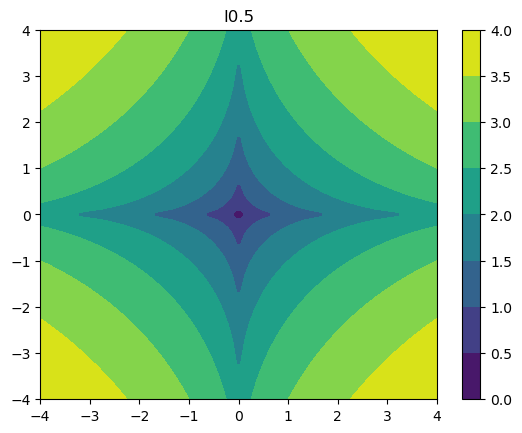

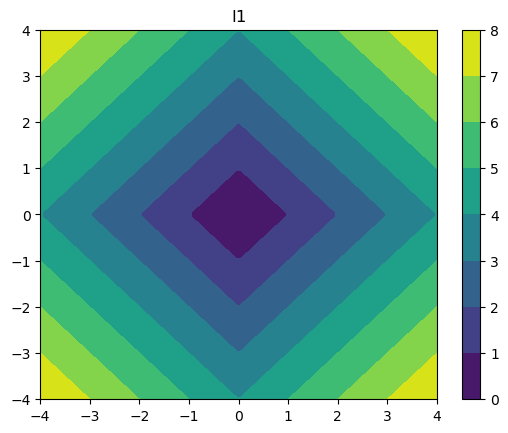

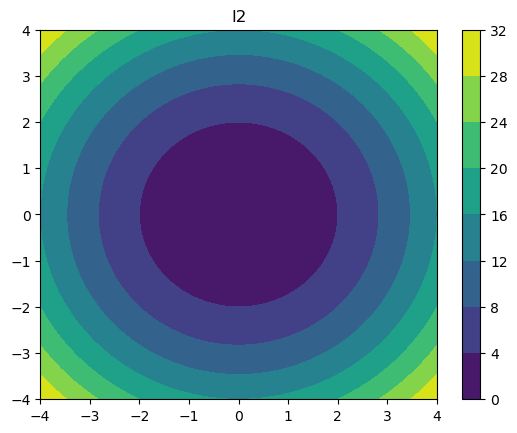

In [503]:
def norm(w, l):
    s = 0
    for x in range(w.shape[0]):
        s += abs(w[x])**l
    s**(1/l)
    return s


norms = [.5, 1, 2]

for l in range(len(norms)):
    x1, x2 = np.meshgrid(np.linspace(-4, 4, 100), np.linspace(-4, 4, 100))
    x = np.vstack([x1.ravel(), x2.ravel()]).T

    z = np.zeros((10000, 1))

    for i in range(10000):
        z[i] = norm(x[i], norms[l]) 
    
    plt.figure(l)
    plt.contourf(x1, x2, z.reshape(x1.shape))
    plt.colorbar()
    plt.title("l" + str(norms[l]))
